In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Ground_Water_Data\\ground_water_quality_in_assam-2014.csv",
                encoding = "unicode_escape")
data.head(2)


,STATION CODE,LOCATIONS,STATE,TEMPERATURE ºC : Min,TEMPERATURE ºC : Max,TEMPERATURE ºC : Mean,pH : Min : 6.5-8.5,pH : Max : 6.5-8.5,pH : Mean : 6.5-8.5,CONDUCTIVITY (µmhos/cm) : Min,...,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Min,NITRATE- N+ NITRITE-N (mg/l) : Max,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml
0,1533,"*DIGBOI, TINSUKIA DISTT., ASSAM",Assam,23.0,24,23.5,6.4,6.6,6.5,734,...,1.4,5.4,8.6,7.0,0,36,18,0,24000,12000
1,1534,"*KARBI ANGLONG DISTT., ASSAM",Assam,23.0,24,23.5,6.2,6.5,6.4,205,...,1.1,0.2,1.2,0.7,0,150,75,0,11000,5500


In [3]:
values = data.drop(["STATION CODE","LOCATIONS","STATE"],axis =1)
values.head()

,TEMPERATURE ºC : Min,TEMPERATURE ºC : Max,TEMPERATURE ºC : Mean,pH : Min : 6.5-8.5,pH : Max : 6.5-8.5,pH : Mean : 6.5-8.5,CONDUCTIVITY (µmhos/cm) : Min,CONDUCTIVITY (µmhos/cm) : Max,CONDUCTIVITY (µmhos/cm) : Mean,B.O.D. (mg/l) : Min : < 3 mg/l,...,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Min,NITRATE- N+ NITRITE-N (mg/l) : Max,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml
0,23.0,24,23.5,6.4,6.6,6.5,734,762,748,0.7,...,1.4,5.4,8.6,7.0,0,36,18,0,24000,12000
1,23.0,24,23.5,6.2,6.5,6.4,205,470,338,0.7,...,1.1,0.2,1.2,0.7,0,150,75,0,11000,5500
2,24.0,25,24.5,6.4,7.5,7.0,302,364,333,0.9,...,1.4,0.3,0.7,0.5,0,0,0,91,91,91
3,20.0,25,22.5,5.5,5.8,5.7,696,885,791,1.3,...,1.9,0.1,0.4,0.3,0,0,0,0,91,46
4,24.0,25,24.5,6.6,7.4,7.0,440,579,510,1.1,...,2.2,2.4,3.8,3.1,36,72,54,2100,4600,3350


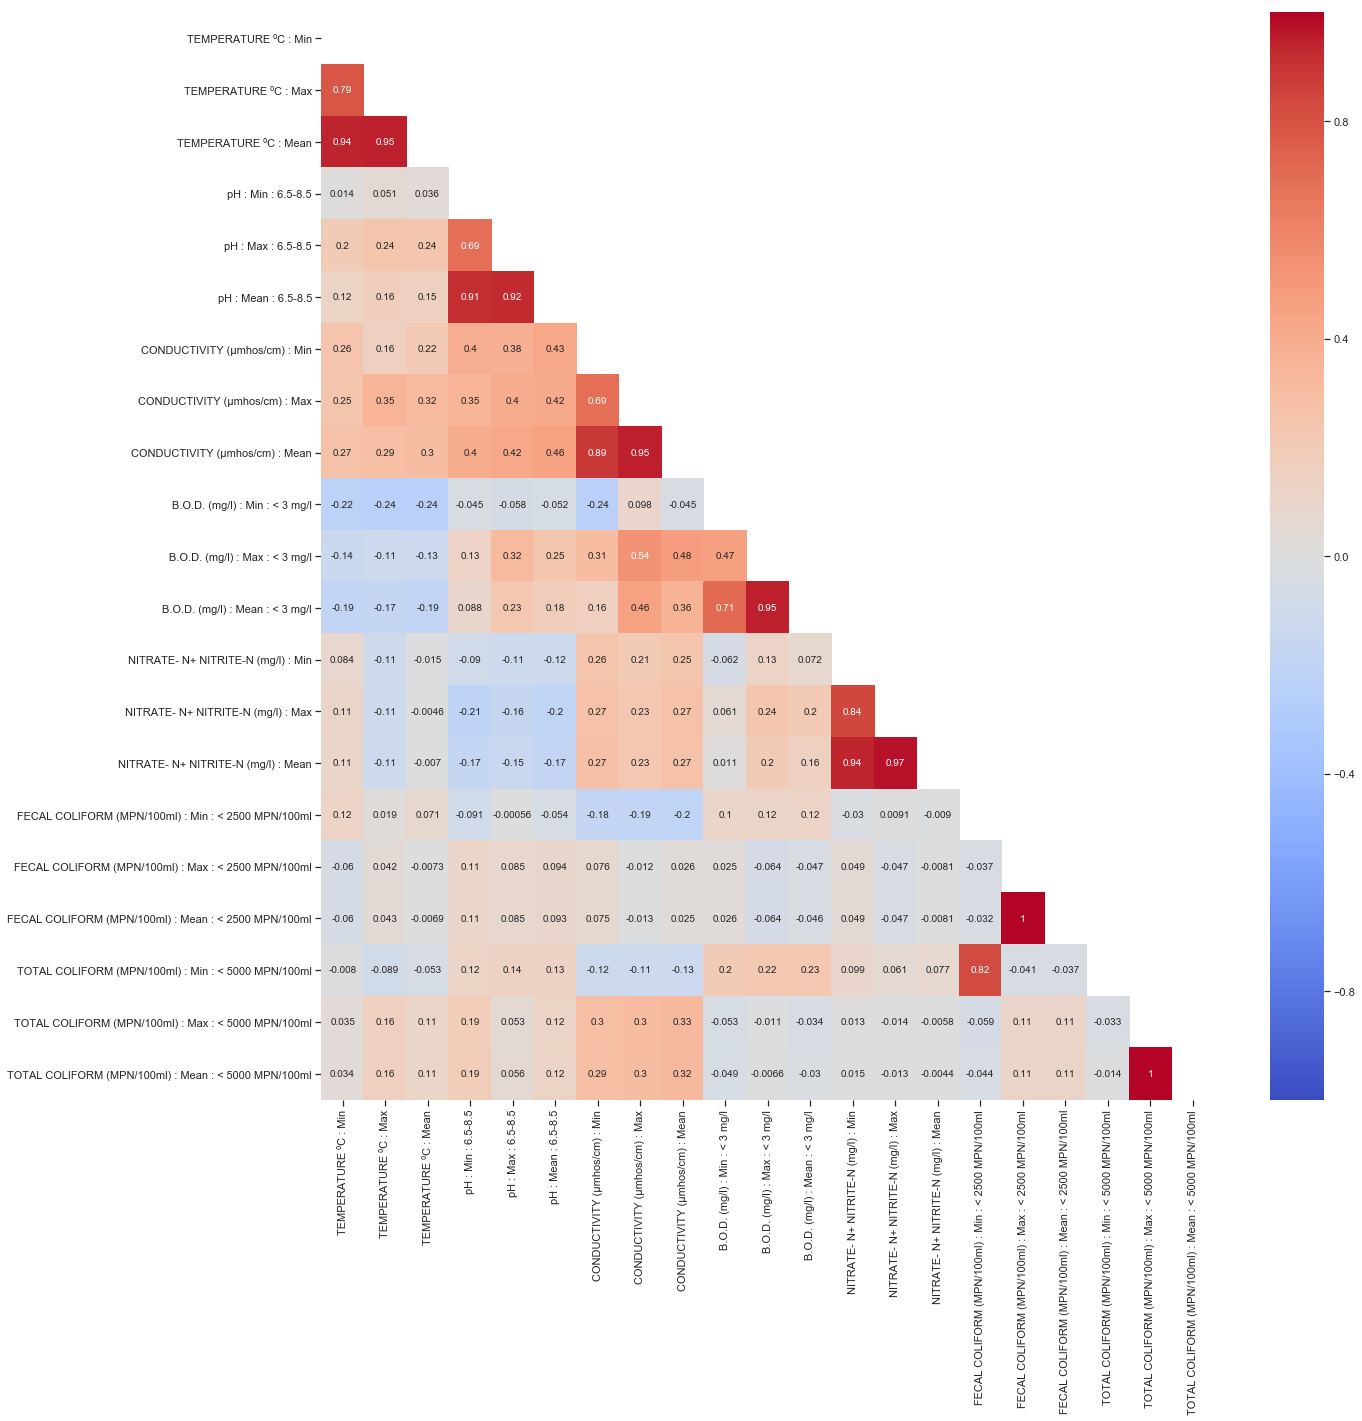

In [4]:
corr = values.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,20))
g = sns.heatmap(corr,
            vmin=-1,
            cmap='coolwarm',
            annot=True,
            mask = mask);
plt.savefig("corr.png")

As is obvious from the given correlation graph, we see that the features are quiet independent of each other, barring the ones that desciribe the same variable. By performing PCA, we will be able to condense the information given to us into fewer meaningful variables.

Now, we'll be performing PCA on all of the data.

# Data Preprocessing - Principal Component Analysis
Principal component analysis (PCA) is a statistical procedure which converts a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components..<br><br>
In this notebook, we use PCA to reduce the dimensions of the ground water dataset.<br>
We start by importing the necessary libraries and loading the dataset into the notebook.

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("Ground_Water_Data\ground_water_quality_in_kerala-2014.csv",
                encoding = "unicode_escape")
df.head()

,STATION CODE,LOCATIONS,STATE,TEMPERATURE ºC : Min,TEMPERATURE ºC : Max,TEMPERATURE ºC : Mean,pH : Min : 6.5-8.5,pH : Max : 6.5-8.5,pH : Mean : 6.5-8.5,CONDUCTIVITY (µmhos/cm) : Min,...,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Min,NITRATE- N+ NITRITE-N (mg/l) : Max,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml
0,19,"WELL AT ELOOR, KERALA",Kerala,27.4,27.5,27.5,5.2,7.2,6.2,137,...,1.0,1.96,3.31,2.6,79,220,150,110,630,370
1,22,"WELL AT CHUNGAPALLY, KERALA",Kerala,24.0,26.0,25.0,5.7,7.7,6.7,103,...,0.4,0.42,1.30,0.9,17,350,184,22,430,226
2,35,"WELL AT PUNALUR, KERALA",Kerala,24.0,24.0,24.0,4.8,7.2,6.0,170,...,0.6,0.81,0.84,0.8,43,280,162,110,430,270
3,1581,"PAPPANAMKODE, THIRUVANANTHAPURAM, KERALA",Kerala,25.0,26.5,25.8,6.0,6.8,6.4,296,...,1.3,0.00,2.30,1.2,79,110,95,220,350,285
4,1582,"NEDUMANGAD, THIRUVANANTHAPURAM, KERALA",Kerala,25.0,26.5,25.8,7.0,7.4,7.2,150,...,4.0,1.20,4.20,2.7,43,94,69,180,240,210


Only features on which it is meaningful to use PCA on are selected.

In [8]:
df.columns

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'TEMPERATURE ºC : Min',
       'TEMPERATURE ºC : Max', 'TEMPERATURE ºC : Mean', 'pH : Min : 6.5-8.5',
       'pH : Max : 6.5-8.5', 'pH : Mean : 6.5-8.5',
       'CONDUCTIVITY (µmhos/cm) : Min', 'CONDUCTIVITY (µmhos/cm) : Max',
       'CONDUCTIVITY (µmhos/cm) : Mean', 'B.O.D. (mg/l) : Min : < 3 mg/l',
       'B.O.D. (mg/l) : Max : < 3 mg/l', 'B.O.D. (mg/l) : Mean : < 3 mg/l',
       'NITRATE- N+ NITRITE-N (mg/l) : Min',
       'NITRATE- N+ NITRITE-N (mg/l) : Max',
       'NITRATE- N+ NITRITE-N (mg/l) : Mean',
       'FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml',
       'FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml',
       'FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml',
       'TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml',
       'TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml',
       'TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml'],
      dtype='object')

In [9]:
data = df.drop(['STATION CODE','LOCATIONS','STATE'], axis=1)
data.head()


,TEMPERATURE ºC : Min,TEMPERATURE ºC : Max,TEMPERATURE ºC : Mean,pH : Min : 6.5-8.5,pH : Max : 6.5-8.5,pH : Mean : 6.5-8.5,CONDUCTIVITY (µmhos/cm) : Min,CONDUCTIVITY (µmhos/cm) : Max,CONDUCTIVITY (µmhos/cm) : Mean,B.O.D. (mg/l) : Min : < 3 mg/l,...,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Min,NITRATE- N+ NITRITE-N (mg/l) : Max,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml
0,27.4,27.5,27.5,5.2,7.2,6.2,137,180,159,0.8,...,1.0,1.96,3.31,2.6,79,220,150,110,630,370
1,24.0,26.0,25.0,5.7,7.7,6.7,103,125,114,0.2,...,0.4,0.42,1.30,0.9,17,350,184,22,430,226
2,24.0,24.0,24.0,4.8,7.2,6.0,170,220,195,0.6,...,0.6,0.81,0.84,0.8,43,280,162,110,430,270
3,25.0,26.5,25.8,6.0,6.8,6.4,296,412,354,1.0,...,1.3,0.00,2.30,1.2,79,110,95,220,350,285
4,25.0,26.5,25.8,7.0,7.4,7.2,150,170,160,1.0,...,4.0,1.20,4.20,2.7,43,94,69,180,240,210


##  Normalising the data -

In [10]:
#we implement normalisation using the z metric using the value (x-u)/sigma
def normalize_data(data):
    mu = np.mean(data, 0)
    sigma = np.std(data, 0)
    data_norm = (data-mu)/sigma
    return data_norm, mu, sigma

In [11]:

data_norm, mu, sigma = normalize_data(data)
data_norm.head()


,TEMPERATURE ºC : Min,TEMPERATURE ºC : Max,TEMPERATURE ºC : Mean,pH : Min : 6.5-8.5,pH : Max : 6.5-8.5,pH : Mean : 6.5-8.5,CONDUCTIVITY (µmhos/cm) : Min,CONDUCTIVITY (µmhos/cm) : Max,CONDUCTIVITY (µmhos/cm) : Mean,B.O.D. (mg/l) : Min : < 3 mg/l,...,B.O.D. (mg/l) : Mean : < 3 mg/l,NITRATE- N+ NITRITE-N (mg/l) : Min,NITRATE- N+ NITRITE-N (mg/l) : Max,NITRATE- N+ NITRITE-N (mg/l) : Mean,FECAL COLIFORM (MPN/100ml) : Min : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Max : < 2500 MPN/100ml,FECAL COLIFORM (MPN/100ml) : Mean : < 2500 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Min : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Max : < 5000 MPN/100ml,TOTAL COLIFORM (MPN/100ml) : Mean : < 5000 MPN/100ml
0,0.272599,-0.221863,0.031817,-0.852026,0.314506,-0.414531,-0.481964,-0.507795,-0.508453,0.254982,...,-0.184101,0.211863,-0.142137,-0.043102,0.042153,-0.156070,-0.111568,-0.318263,0.065824,-0.041570
1,-1.734561,-1.007629,-1.391577,-0.349094,0.999967,0.214668,-0.724098,-0.750344,-0.759723,-1.422965,...,-0.252015,-0.801208,-0.825714,-0.902175,-0.477486,0.221506,0.045715,-0.670423,-0.233175,-0.376871
2,-1.734561,-2.055316,-1.960935,-1.254372,0.314506,-0.666210,-0.246952,-0.331396,-0.307437,-0.304334,...,-0.229377,-0.544651,-0.982155,-0.952708,-0.259573,0.018195,-0.056056,-0.318263,-0.233175,-0.274418
3,-1.144220,-0.745707,-0.936091,-0.047335,-0.233863,-0.162851,0.650369,0.515318,0.580385,0.814298,...,-0.150144,-1.077500,-0.485626,-0.750574,0.042153,-0.475558,-0.365996,0.121938,-0.352775,-0.239491
4,-1.144220,-0.745707,-0.936091,0.958530,0.588691,0.843866,-0.389384,-0.551895,-0.502869,0.814298,...,0.155470,-0.288094,0.160542,0.007431,-0.259573,-0.522029,-0.486271,-0.038135,-0.517224,-0.414127


## PCA comprises of the following  steps - 
1) Calculate the covariance matrix<br> 
2) Obtain the eigenvectors and eigenvalues corresponding to the covariance matrix<br>
3) Using the eigenvectors correspongind to the k largest eigenvaleus to construct the principal components <br>
4) Project the data onto the principal components to get the compressed dataset<br>

## Step 1: Calculate the covariance matrix -

In [12]:
cov_mat = np.cov(data_norm.transpose())
print(cov_mat.shape)
#print(cov_mat)

(21, 21)


## Step 2: Compute eigenvectors and eigenvalues of the covariance matrix - 

In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vecs.shape)
#print(eig_vals)
#print(eig_vecs)

(21, 21)


## Step 3: Construct the principal components

To choose the number of eigenvectors we are using, we  can utilize a scree plot.<br>
For the other datasets, eigenvectors corresponding to eigenvalues greater than will be chosen.

Text(0.5, 1.0, 'Scree Plot')

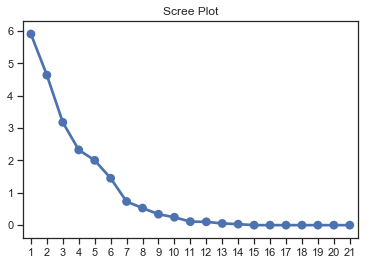

In [14]:
index = np.arange(1,eig_vals.shape[0]+1)
import seaborn as sns
sns.pointplot(x=index, y=eig_vals).set_title("Scree Plot")

An elbow is seen at 6  components on the x-axis. Using 6 components, the explained variance is:

In [15]:
print(np.sum(eig_vals[0:6]/np.sum(eig_vals)))

0.901280265173478


In [16]:
print(np.sum(eig_vals>1)*1)

6


Making a matrix of only the first 6 eigenvectors

In [17]:
eig_vecs = eig_vecs[:,0:6]
eig_vecs.shape

(21, 6)

## Step 5: Project the data onto the new compressed space

In [18]:
Y_pca = data_norm.dot(eig_vecs)
print(data_norm.shape)

(34, 21)


As we can see, we have transformed the original dataset which was 34x21 to one which is 34x6!

For convenience the following function will be used to perform PCA on the data of the remaining states -

In [19]:
 def pca(data):
    data_norm,mu,sigma = normalize_data(data)
    cov_mat = np.cov(data_norm.transpose())
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    n = np.sum(eig_vals>1)*1

    
    eig_vecs = eig_vecs[:,0:n]
    Y_pca = data_norm.dot(eig_vecs)
    return Y_pca

In [20]:
pca(data_norm)

,0,1,2,3,4,5
0,-0.002517,0.886812,-0.159971,-0.239243,-0.446805,-0.183853
1,1.144131,1.972697,2.223529,0.453587,-0.450619,0.082444
2,1.123785,2.709839,2.107992,0.269000,1.163080,0.725423
3,1.313990,0.353769,1.175282,0.564365,1.516171,0.582125
4,1.303213,0.598026,1.014326,-0.149687,0.588747,-1.766330
5,2.283585,5.015117,0.815366,0.007260,1.610989,2.504142
6,1.074414,-1.125584,1.303536,1.923000,-2.046681,-0.704203
7,0.252157,-2.958610,-0.445071,-1.329630,0.600681,-1.814888
8,0.761869,0.324315,-1.832895,-2.582913,0.366297,0.836919
9,-1.029713,-0.977665,-1.565111,-3.989032,0.058247,-1.544170


Now, to perform PCA on the entire dataset

In [21]:
data_norm.dtypes

TEMPERATURE ºC : Min                                    float64
TEMPERATURE ºC : Max                                    float64
TEMPERATURE ºC : Mean                                   float64
pH : Min : 6.5-8.5                                      float64
pH : Max : 6.5-8.5                                      float64
pH : Mean : 6.5-8.5                                     float64
CONDUCTIVITY (µmhos/cm) : Min                           float64
CONDUCTIVITY (µmhos/cm) : Max                           float64
CONDUCTIVITY (µmhos/cm) : Mean                          float64
B.O.D. (mg/l) : Min : < 3 mg/l                          float64
B.O.D. (mg/l) : Max : < 3 mg/l                          float64
B.O.D. (mg/l) : Mean : < 3 mg/l                         float64
NITRATE- N+ NITRITE-N (mg/l) : Min                      float64
NITRATE- N+ NITRITE-N (mg/l) : Max                      float64
NITRATE- N+ NITRITE-N (mg/l) : Mean                     float64
FECAL COLIFORM (MPN/100ml) : Min : < 250

In [22]:
data = pd.read_csv("Ground_water_pre_processed\\filled_groundwater.csv")


In [23]:
states = data["State"]
values = data.drop(["STATION CODE","LOCATIONS","State"],axis =1)


In [24]:
temp = pca(values)

In [25]:
df_concat = pd.concat([states, temp], axis=1)

In [26]:
df_concat.groupby('State', as_index=False).mean()

,State,0,1,2,3,4,5
0,andhra_pradesh,0.643853,-2.106776,-0.920001,-0.480978,-1.322917,-1.333550
1,assam,-1.832355,0.335670,0.445098,-1.862397,0.046099,0.415783
2,bihar,2.643535,2.377982,1.179885,0.097733,-0.316285,-0.040822
3,daman_diu_dadra_nagar_haveli,1.612686,0.769691,0.002864,0.827348,-3.599218,1.176438
4,goa,-2.158717,0.022001,-1.433021,1.223452,-0.612212,1.792718
5,himachal_pradesh,-0.590000,0.812566,-0.848724,-0.918830,2.436834,-1.460746
6,kerala,-2.921569,-0.048416,0.342399,-0.213826,-0.302983,0.386467
7,odisha,-2.545963,-0.818325,-1.930774,0.485985,0.080489,-1.079983
8,rajasthan,4.175763,-2.359149,-0.250323,-0.003771,0.513383,0.433121
9,uttar_pradesh_uttarakhand,3.252795,1.695398,1.343775,0.471492,0.969210,-0.817328


In [27]:
df_concat.to_csv('PCA_All_states.csv')